# Feed Forward Neural Networks

In [ ]:
# jupyter notebook

In [ ]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
from keras.callbacks import EarlyStopping

# Train

In [3]:
cd C:\weather\v4\data\train

C:\weather\v4\data\train


In [4]:
forders_tr = os.listdir()
forders_tr

['table_202001_v4.csv',
 'table_202002_v4.csv',
 'table_202003_v4.csv',
 'table_202004_v4.csv',
 'table_202005_v4.csv',
 'table_202006_v4.csv',
 'table_202007_v4.csv',
 'table_202008_v4.csv',
 'table_202009_v4.csv',
 'table_202010_v4.csv',
 'table_202011_v4.csv',
 'table_202012_v4.csv',
 'table_202101_v4.csv',
 'table_202102_v4.csv',
 'table_202103_v4.csv',
 'table_202104_v4.csv',
 'table_202105_v4.csv',
 'table_202106_v4.csv']

In [5]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(files)
    train = pd.concat([train, df])

In [6]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476,-0.333333,1.000000
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533,3.000000,-0.310345
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872,0.333333,1.000000
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385,-3.000000,-1.000000
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,1,0,0,-0.188191,-1.022276,-0.499305,0.114355,1.402172,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,30,23,50,0.000385,1.107682,1.107273,0.000000,0.209894,-0.497908,-0.310345
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,30,23,50,0.071010,1.472435,1.488681,0.000000,0.000000,-0.711538,-1.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,30,23,50,-0.144802,1.049670,1.210674,0.000000,0.000000,-1.666667,-1.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,30,23,50,-0.365471,0.726709,0.740235,0.000000,0.000000,2.333333,1.000000


# Validation

In [7]:
cd C:\weather\v4\data\val

C:\weather\v4\data\val


In [8]:
forders_val = os.listdir()
forders_val

['table_202109_v4.csv',
 'table_202110_v4.csv',
 'table_202111_v4.csv',
 'table_202112_v4.csv']

In [9]:
# 새로운 데이터 프레임 생성
val = pd.DataFrame()

for files in forders_val:
    df= pd.read_csv(files)
    val = pd.concat([val, df])

In [10]:
val

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,202109010000,90,128.56473,38.25085,17.9,0.00170,0.00171,0.00238,0.00195,0.00181,...,1,0,0,-0.733944,0.000000,0.000000,0.000000,0.508451,-0.099307,0.028409
1,202109010000,93,127.75443,37.94738,19.0,0.00170,0.00171,0.00149,0.00180,0.00121,...,1,0,0,-0.696051,-0.914975,0.447435,0.341129,-0.179931,0.094225,-0.171233
2,202109010000,95,127.30420,38.14787,17.6,0.00170,0.00228,0.00179,0.00195,0.00151,...,1,0,0,-0.279810,0.000000,0.000000,0.000000,-0.365214,0.042781,-0.203166
3,202109010000,98,127.06070,37.90188,19.3,0.00227,0.00228,0.00238,0.00374,0.00181,...,1,0,0,-0.195837,0.000000,0.000000,0.000000,-0.290579,0.222222,-0.114914
4,202109010000,99,126.76648,37.88589,19.6,0.00227,0.00228,0.00268,0.00239,0.00151,...,1,0,0,-0.370219,0.000000,0.000000,0.000000,0.015434,-0.057199,-0.203166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312350,702,126.99435,35.94504,-3.2,-0.00057,-0.00057,-0.00030,-0.00045,-0.00030,...,31,23,50,-0.787369,-1.417396,-1.534663,0.000000,0.000000,0.200000,-0.310345
432626,202112312350,972,128.68340,36.54983,-4.8,-0.00057,0.00057,0.00089,-0.00015,0.00000,...,31,23,50,-0.672741,-1.492066,-1.894582,0.000000,1.185870,-1.405405,-1.000000
432627,202112312350,973,126.94961,35.02330,-2.4,0.00000,-0.00057,-0.00179,0.00015,-0.00030,...,31,23,50,-0.684352,-0.847900,-0.716603,0.000000,1.525860,-1.182927,-0.310345
432628,202112312350,974,128.15605,35.24435,-1.8,-0.00057,-0.00057,0.00060,-0.00015,0.00000,...,31,23,50,-2.065335,-1.364155,-0.756098,0.000000,0.000000,-1.666667,-1.000000


# Test

In [54]:
cd C:\weather\v4\data\test

C:\weather\v4\data\test


In [55]:
forders_te = os.listdir()
forders_te

['table_202107_1_v4.csv', 'table_202108_2_v4.csv']

In [56]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

# 새로운 데이터 프레임 생성
test = pd.DataFrame()

for files in forders_te:
    df= pd.read_csv(files)
    test = pd.concat([test, df])

In [57]:
test

,YearMonthDayHourMinute,STN,Lon,Lat,Band1,Band2,Band3,Band4,Band5,Band6,...,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,202107000000,90,128.56473,38.25085,-0.00057,-0.00057,-0.00149,-0.00045,-0.00060,0.00000,...,0,0,0,-0.137869,0.000000,0.000000,0.000000,0.503333,-0.536082,0.025641
1,202107000000,93,127.75443,37.94738,-0.00057,-0.00057,-0.00119,0.00000,0.00000,-0.00065,...,0,0,0,0.115111,-0.141101,0.027567,-0.354792,0.074239,-1.000000,-1.000000
2,202107000000,95,127.30420,38.14787,-0.00057,-0.00057,-0.00060,0.00015,0.00000,-0.00065,...,0,0,0,-0.072823,0.000000,0.000000,0.000000,-0.073873,-1.666667,-1.000000
3,202107000000,98,127.06070,37.90188,-0.00057,-0.00057,0.00030,-0.00015,-0.00030,-0.00065,...,0,0,0,0.138902,0.000000,0.000000,0.000000,0.065445,-3.000000,-0.310345
4,202107000000,99,126.76648,37.88589,-0.00057,0.00000,-0.00060,-0.00105,0.00000,-0.00065,...,0,0,0,0.177468,0.000000,0.000000,0.000000,0.444882,0.272727,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,202108000000,973,126.94961,35.02330,0.00000,0.00000,0.00030,0.00015,0.00121,0.00000,...,0,0,0,-0.207862,1.366354,0.637043,0.000000,0.664962,-0.333333,1.000000
27088,202108000000,974,128.15605,35.24435,0.00000,0.00057,0.00000,0.00015,0.00000,0.00000,...,0,0,0,-0.559507,1.766315,1.253310,0.000000,0.000000,1.000000,-1.000000
27089,202108000000,977,127.46688,36.72455,0.00000,0.00057,-0.00179,0.00030,0.00000,0.00000,...,0,0,0,-0.449989,-0.705848,-0.467874,0.000000,0.000000,-1.402685,-1.000000
27090,202108000000,978,127.77626,37.95461,0.00000,0.00000,0.00089,0.00015,-0.00030,0.00000,...,0,0,0,-0.374500,-1.392848,-0.768451,0.000000,0.000000,-0.711538,1.000000


# Submission

In [15]:
cd C:\weather\data

C:\weather\data


In [16]:
# Set Pandas options to display more columns
# pd.options.display.max_columns=50
submission=pd.read_csv('1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [6]:
train.isnull().any()

YearMonthDayHourMinute    False
STN                       False
Lon                       False
Lat                       False
isitu-LST                 False
Band1                     False
Band2                     False
Band3                     False
Band4                     False
Band5                     False
Band6                     False
Band7                     False
Band8                     False
Band9                     False
Band10                    False
Band11                    False
Band12                    False
Band13                    False
Band14                    False
Band15                    False
Band16                    False
30daysBand3               False
30daysBand13              False
GK2A-LST                  False
SolarZA                   False
SateZA                    False
ESR                       False
Height                    False
LandType                  False
insitu-TA                 False
insitu-HM                 False
insitu-T

# 모델 Train

In [26]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476,-0.333333,1.000000
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533,3.000000,-0.310345
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872,0.333333,1.000000
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385,-3.000000,-1.000000
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,1,0,0,-0.188191,-1.022276,-0.499305,0.114355,1.402172,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,30,23,50,0.000385,1.107682,1.107273,0.000000,0.209894,-0.497908,-0.310345
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,30,23,50,0.071010,1.472435,1.488681,0.000000,0.000000,-0.711538,-1.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,30,23,50,-0.144802,1.049670,1.210674,0.000000,0.000000,-1.666667,-1.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,30,23,50,-0.365471,0.726709,0.740235,0.000000,0.000000,2.333333,1.000000


In [27]:
##### Step 1 - Select data for modeling(training data & validation data
X_train = train.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','mean_34_37', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)
X_test = val.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','mean_34_37', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)

y_train=train[['isitu-LST', 'insitu-TA']].values
y_test=val[['isitu-LST', 'insitu-TA']].values

X_train

,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,mean_6_23,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,-999.00000,162.63634,44.52481,-9.38141,17.53,2,30.3,-17.7,-4.2,0.422121,0.000000,0.000000,0.868476,-0.333333,1.000000
1,-999.00000,162.17793,44.41427,-9.36082,155.48,2,64.1,-14.5,-7.9,-0.391234,0.000000,0.000000,1.114533,3.000000,-0.310345
2,-999.00000,162.27711,44.13104,-9.36664,115.62,2,58.4,-14.7,-7.4,-0.355405,0.000000,0.000000,1.315872,0.333333,1.000000
3,-999.00000,162.14729,44.12316,-9.36060,30.59,2,52.8,-15.4,-6.5,-0.332510,0.000000,0.000000,1.666385,-3.000000,-1.000000
4,-9.38000,162.57755,44.12761,-9.38050,75.82,3,66.0,-14.3,-14.1,-0.188191,-0.499305,0.114355,1.402172,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,19.20999,120.35766,40.87855,-4.18556,39.64,2,96.9,20.0,19.4,0.000385,1.107273,0.000000,0.209894,-0.497908,-0.310345
447706,20.35001,120.38888,41.10588,-4.21799,16.78,2,93.5,18.7,-999.0,0.071010,1.488681,0.000000,0.000000,-0.711538,-1.000000
447707,14.64999,118.81387,42.79873,-3.99159,40.35,2,98.3,21.6,21.9,-0.144802,1.210674,0.000000,0.000000,-1.666667,-1.000000
447708,-999.00000,117.67587,44.18884,-3.84460,140.37,2,95.9,20.1,19.2,-0.365471,0.740235,0.000000,0.000000,2.333333,1.000000


In [28]:
X_train.isnull().any()

GK2A-LST      False
SolarZA       False
SateZA        False
ESR           False
Height        False
LandType      False
insitu-HM     False
insitu-TD     False
insitu-TG     False
mean_6_23     False
mean_38_39    False
mean_40_42    False
mean_43_44    False
NDVI          False
NDWI          False
dtype: bool

In [29]:
X_test

,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,mean_6_23,mean_38_39,mean_40_42,mean_43_44,NDVI,NDWI
0,-999.00000,132.65269,44.52481,-6.38871,17.53,2,97.3,16.9,17.8,-0.733944,0.000000,0.000000,0.508451,-0.099307,0.028409
1,-999.00000,132.82147,44.16866,-6.41119,95.78,3,98.5,17.5,17.5,-0.696051,0.447435,0.341129,-0.179931,0.094225,-0.171233
2,-999.00000,132.53152,44.41427,-6.37791,155.48,2,100.0,17.1,17.1,-0.279810,0.000000,0.000000,-0.365214,0.042781,-0.203166
3,13.45001,132.73465,44.13104,-6.40288,115.62,2,99.9,17.7,18.1,-0.195837,0.000000,0.000000,-0.290579,0.222222,-0.114914
4,-999.00000,132.69038,44.12316,-6.39848,30.59,2,99.8,17.7,18.0,-0.370219,0.000000,0.000000,0.015434,-0.057199,-0.203166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,-9.10999,162.38597,41.92041,-8.86355,15.12,2,82.1,-10.7,-9.7,-0.787369,-1.534663,0.000000,0.000000,0.200000,-0.310345
432626,-9.66000,162.89288,42.59904,-8.93360,88.62,2,40.1,-17.3,-8.5,-0.672741,-1.894582,0.000000,1.185870,-1.405405,-1.000000
432627,-7.60999,162.98303,40.87855,-8.88743,39.64,2,53.4,-11.7,-4.8,-0.684352,-0.716603,0.000000,1.525860,-1.182927,-0.310345
432628,-999.00000,163.56012,41.10588,-8.94638,16.78,2,36.2,-15.7,-999.0,-2.065335,-0.756098,0.000000,0.000000,-1.666667,-1.000000


In [30]:
##### Step 2 - Create training and testing samples
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a neural network
model2 = Sequential(name="Model-with-Two-Inputs")
model2.add(Input(shape=(len(X_train.columns),), name='Input-Layer'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer1'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer2'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer3'))
model2.add(Dense(2, activation='relu', name='Output-Layer'))


##### Step 4 - Compile the keras model
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None, 
              steps_per_execution=None 
             )

model2.summary()

Model: "Model-with-Two-Inputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 15)                240       
                                                                 
 Hidden-Layer2 (Dense)       (None, 15)                240       
                                                                 
 Hidden-Layer3 (Dense)       (None, 15)                240       
                                                                 
 Output-Layer (Dense)        (None, 2)                 32        
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


In [31]:
cd C:\weather\v4

C:\weather\v4


In [32]:
os.getcwd()

'C:\\weather\\v4'

In [33]:
es = EarlyStopping(monitor='val_mse', verbose=1, patience=10)

In [34]:
##### Step 5 - Fit keras model on the dataset

# Set Directory
save_dir = os.path.join(os.getcwd(),'save')

model_name = 'ffnn_v4.{epoch:02d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_mse',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint,es]                  

In [35]:
hist = model2.fit(X_train.to_numpy(),       # input data
          y_train,                 # target data
          batch_size=32,    
          epochs=100,         # 늘려야 할 부분     
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=callbacks)

Epoch 1/100
256330/256334 [============================>.] - ETA: 0s - loss: 5.1941 - mse: 5.1941
Epoch 1: val_mse improved from inf to 3.43856, saving model to C:\weather\v4\save\ffnn_v4.01.h5
256334/256334 [==============================] - 876s 3ms/step - loss: 5.1941 - mse: 5.1941 - val_loss: 3.4386 - val_mse: 3.4386
Epoch 2/100
256329/256334 [============================>.] - ETA: 0s - loss: 4.5509 - mse: 4.5509
Epoch 2: val_mse did not improve from 3.43856
256334/256334 [==============================] - 863s 3ms/step - loss: 4.5509 - mse: 4.5509 - val_loss: 3.4685 - val_mse: 3.4685
Epoch 3/100
256319/256334 [============================>.] - ETA: 0s - loss: 4.5430 - mse: 4.5430
Epoch 3: val_mse did not improve from 3.43856
256334/256334 [==============================] - 874s 3ms/step - loss: 4.5432 - mse: 4.5432 - val_loss: 4.1414 - val_mse: 4.1414
Epoch 4/100
256332/256334 [============================>.] - ETA: 0s - loss: 4.4315 - mse: 4.4315
Epoch 4: val_mse improved from 3.

In [39]:
model2.save('ffnn_v4.h5')

In [40]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# or save to csv: 
hist_csv_file = 'ffnn_v4_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [41]:
hh = pd.read_csv('ffnn_v4_history.csv')
hh

,Unnamed: 0,loss,mse,val_loss,val_mse
0,0,5.194119,5.194119,3.438562,3.438562
1,1,4.550865,4.550865,3.468518,3.468518
2,2,4.543180,4.543180,4.141354,4.141354
3,3,4.431516,4.431516,3.298101,3.298101
4,4,4.389623,4.389623,3.427183,3.427183
5,5,4.345040,4.345040,3.325623,3.325623
6,6,4.329784,4.329784,3.405015,3.405015
7,7,4.322357,4.322357,3.361392,3.361392
8,8,4.308905,4.308905,3.419151,3.419151
9,9,4.289343,4.289343,3.378441,3.378441


# 시각화

Loss

In [42]:
def Plot_history(history):
  plt.subplot(211)
  plt.plot(hist.history['loss'], color = 'b', label = 'train')
  plt.plot(hist.history['val_loss'], color = 'g', label = 'test')
  plt.ylabel('Loss')
  plt.legend()

#   plt.subplot(212)
#   plt.plot(hist.history['mse'], color = 'r', label = 'train')
#   plt.plot(hist.history['val_mse'], color = 'black', label = 'test')
#   plt.xlabel('Epoch')
#   plt.ylabel('mse')
#   plt.legend()
#   plt.show()  

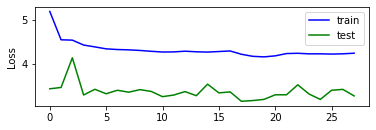

In [43]:
Plot_history(hist)

In [45]:
cd C:\weather\v4\save

C:\weather\v4\save


In [46]:
forders_te = os.listdir()
forders_te

['ffnn_v4.01.h5', 'ffnn_v4.04.h5', 'ffnn_v4.11.h5', 'ffnn_v4.18.h5']

In [47]:
# 조기종료 되게만든 weight 적용
model = load_model(forders_te[-1])
scores = model.evaluate(X_test, y_test)
print('Test loss:', scores[0])
print('Test mse:', scores[1])

55630/55630 [==============================] - 43s 766us/step - loss: 3.1542 - mse: 3.1542
Test loss: 3.1541810035705566
Test mse: 3.1541810035705566


LST,TA

In [ ]:
# LST,TA 얼마나 잘 맞췄는지 겹쳐 그래프도 그리기

In [48]:
pred_te = model.predict(X_test)
pred_te

55630/55630 [==============================] - 47s 841us/step


array([[18.651663  , 17.58055   ],
       [18.767834  , 17.970608  ],
       [18.26855   , 17.377165  ],
       ...,
       [ 0.        ,  0.        ],
       [ 0.30042076,  0.        ],
       [ 3.401451  ,  3.5587215 ]], dtype=float32)

In [49]:
lst_pr = []
ta_pr = []
for i in range(len(pred_te)):
    lst_pr.append(pred_te[i][0])
    ta_pr.append(pred_te[i][1])

In [50]:
lst_re = []
ta_re = []
for i in range(len(y_test)):
    lst_re.append(y_test[i][0])
    ta_re.append(y_test[i][1])

In [51]:
def value_compare():
  plt.subplot(211)
  plt.plot(lst_pr[500:550], color = 'b', label = 'pred')
  plt.plot(lst_re[500:550], color = 'g', label = 'real')
  plt.ylabel('LST')
  plt.legend()

  plt.subplot(212)
  plt.plot(ta_pr[700:750], color = 'r', label = 'pred')
  plt.plot(ta_re[700:750], color = 'black', label = 'real')
  plt.ylabel('TA')
  plt.legend()
  plt.show()  

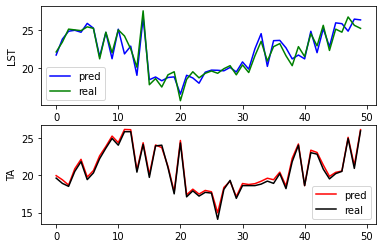

In [52]:
value_compare()

# 예측 값 파일에 저장

In [59]:
test_ = test.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','mean_34_37', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat'], axis=1)

In [60]:
pred = model.predict(test_)
pred

1704/1704 [==============================] - 2s 993us/step


array([[21.72176 , 21.226954],
       [21.01493 , 20.577835],
       [20.235031, 19.349743],
       ...,
       [22.610424, 20.504202],
       [18.944595, 17.79078 ],
       [26.421368, 24.503815]], dtype=float32)

In [61]:
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [62]:
submission1[['isitu-LST', 'insitu-TA']] = pred
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.721760,21.226954
1,202107010030,93,21.014931,20.577835
2,202107010030,95,20.235031,19.349743
3,202107010030,98,20.588341,19.591331
4,202107010030,99,20.889606,19.988848
...,...,...,...,...
54498,202108312330,973,25.398682,24.268391
54499,202108312330,974,22.216217,23.877550
54500,202108312330,977,22.610424,20.504202
54501,202108312330,978,18.944595,17.790779


In [63]:
cd C:\weather\v4

C:\weather\v4


In [64]:
submission1.to_csv("ffnn_v4_220224.csv", index = False)    # 접수번호로 저장